<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp-DataScience-modulo1/blob/main/Bootcamp_Datascience_aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caderno de exploração dos dados do DATASUS, processados a partir de 2008.



---

# **Aula 4** - Análise de gráficos e criação de hipótese

---


In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:.2f}".format
sns.set()



---


*Informações obtidas do site TABNET*

Localização: Informações de Saúde TABNET -> Assistência à Saúde -> Dados Consolidados AIH (RD), por local de internação, a partir de 2008 -> Brasil por região e unidade de Federação
Filtros
*   **Linha**: Unidade da Federação
*   **Coluna**: Ano Mês Atendimento
*   **Conteúdo**: Valor Total
*   **Período**: de: Jan-2008 até: Mar-2021

**Nome do arquivo**: /content/drive/MyDrive/databases/A102533189_28_143_208-A.csv

---



In [2]:
dados = pd.read_csv("/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", engine='python', encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")

In [3]:
# tolist() para permitir que o index seja mutável 
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

In [4]:
usaveis = dados[colunas_usaveis]
# a Unidade da Federação agora é meu índice
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [5]:
# vamos ordenar nossos dados pelo Total
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)

# vamos retirar o ano de 2007 
colunas_interessantes = ordenado_por_total.columns[6:]

# retirar o ano de 2021
colunas_interessantes = colunas_interessantes[0:len(colunas_interessantes)-3]
ordenado_por_total = ordenado_por_total[colunas_interessantes]

# trabalhar com os valores na casa dos milhões
ordenado_por_total_milhoes = ordenado_por_total / 1000000

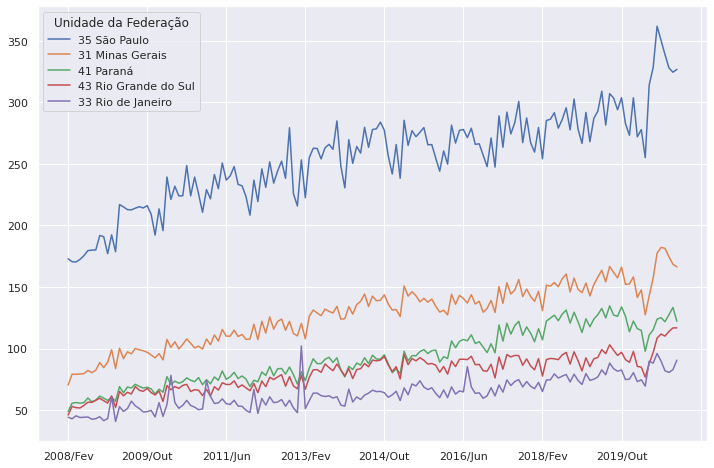

In [6]:
ordenado_por_total_milhoes.head(5).T.plot(figsize=(12,8))
plt.show()

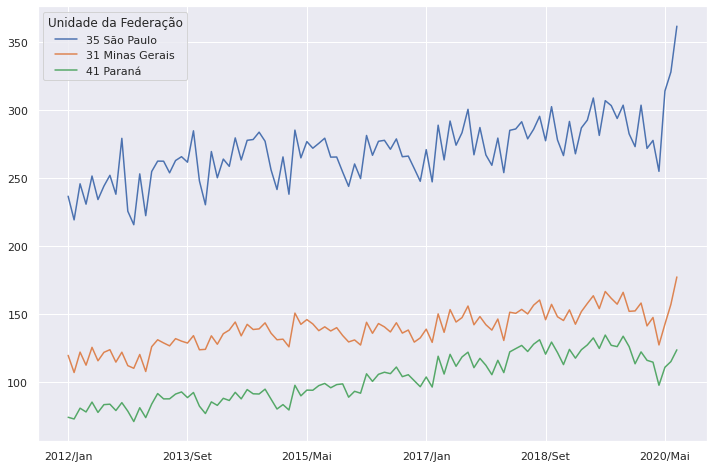

In [7]:
# vamos separar alguns meses para análise

meses_filtrados = ordenado_por_total_milhoes.columns[47:150]
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(12,8))
plt.show()

***ATENÇÃO!!!***
Atente ao eixo (y)! Ele não começa em 0 (zero) mas em 50 (cinquenta), cuidado, visualmente dá a impressão que São Paulo gastou 4 vezes mais que o Paraná em 2013/Set.

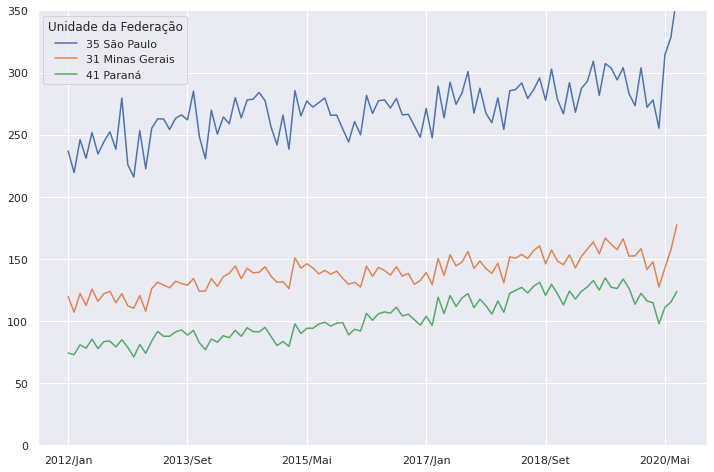

In [8]:
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(12,8))

# Utilizando o ylim() para controlar o "corte" utilizado no eixo y
plt.ylim(0, 350)
plt.show()

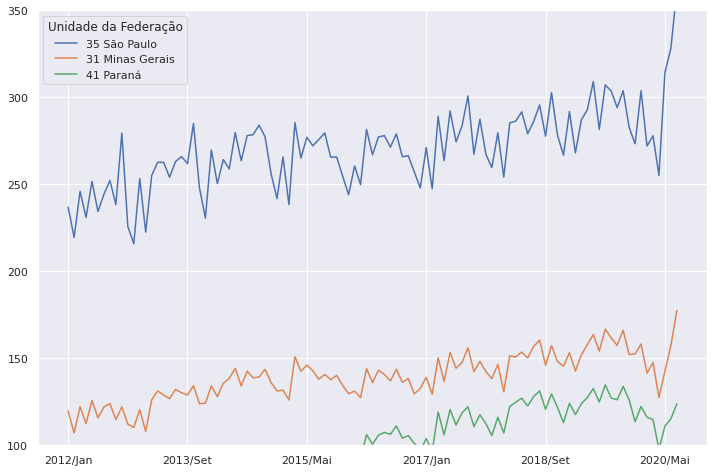

In [9]:
# mais uma visualização distorcida devido a manipulação do eixo.

ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(12,8))
plt.ylim(100, 350)
plt.show()

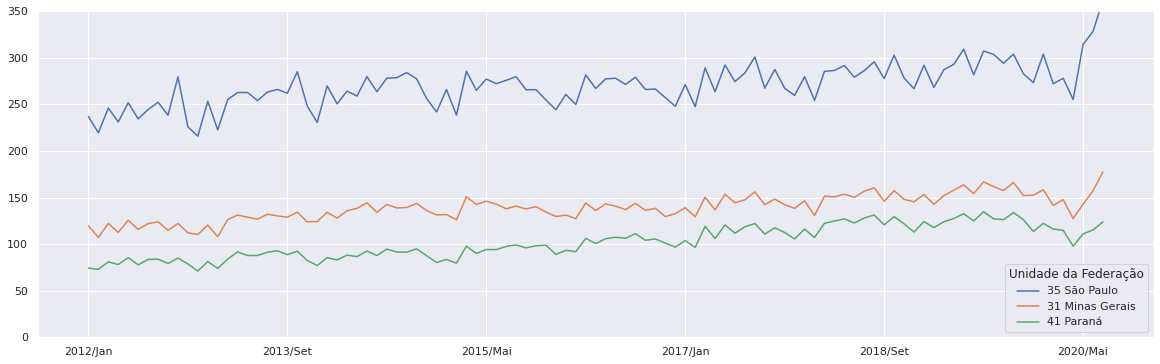

In [10]:
# Visualização distorcida devido ao tamanho do gráfico.

ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(20,6))
plt.ylim(0, 350)
plt.show()

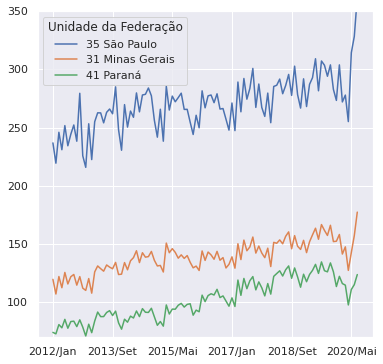

In [11]:
# Mais uma visualização distorcida devido ao tamanho do gráfico. A linha de gastos parece mais inclinado.

ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(6,6))
plt.ylim(70, 350)
plt.show()

## Desafios aula 4

**Desafio 01**: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações.

*Nos gráficos acima podemos perceber com as mudanças dos eixo (x ou y) bem como a "lagura" do gráfico podem gerar falsas interpretações e expectativas.
A percepção comparativa com a linha "0" na manipulação dos eixos e a inclinação da linha de tendência pode gerar falsa interpretação*

**Desafio 02**: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

*Temos que prestar atenção na informação do gráfico e ter o cuidado de passar e mensagem desejada.*
